In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mt
import warnings

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings(action='ignore') 

from src import crs

In [3]:
# 1. load_excel
data_path = "data/apt_1.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

# 2. data preprocessing
p, m = crs.utils.data_preprocessing(xlsx)

m.set_index("month", inplace=True)

# 3. data init
_month = 1

month_df = pd.DataFrame(m.loc[_month])
month_df.reset_index(inplace=True)

month_df.columns = ['name', 'usage (kWh)']

PUBLIC_PERCENTAGE = 30
APT = crs.utils.get_APT(month_df, PUBLIC_PERCENTAGE)

calc = crs.models.ManagementOffice(
        month=_month,
        households=month_df,
        APT=APT,
        contract="단일계약"
    )
apt = calc.apart

In [11]:
public_bill = calc.public_bill
public_bill

2640560

In [22]:
_public_bill = public_bill / len(month_df)
_public_bill

24449.62962962963

# 기여도 산정

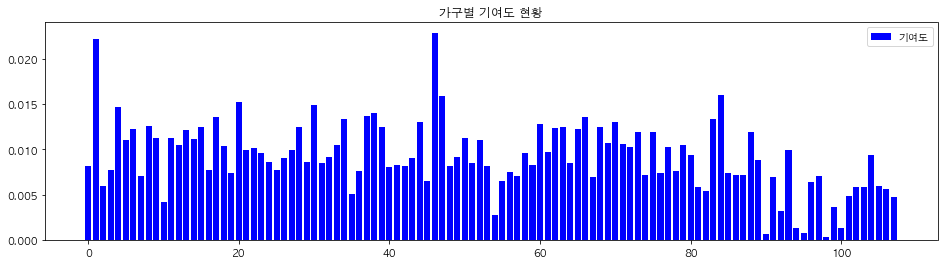

In [19]:
households_kWh = month_df['usage (kWh)'].sum()

month_df['contribution'] = month_df['usage (kWh)'] / households_kWh 

plt.figure(figsize=(16,4))

plt.bar(range(len(month_df)), month_df['contribution'], color='b', label='기여도')
plt.title("가구별 기여도 현황")
plt.legend()

plt.show()

# 단순 가격분배

In [30]:
simple_cont = month_df.copy()
simple_cont['단순 가격분배'] = round(public_bill * simple_cont['contribution']).astype("int")

simple_cont.head(10)

,name,usage (kWh),contribution,단순 가격분배
0,아파트1-101-1002,253,0.008134,21478
1,아파트1-101-104,689,0.022151,58492
2,아파트1-101-1102,183,0.005883,15536
3,아파트1-101-1202,239,0.007684,20290
4,아파트1-101-1302,455,0.014628,38627
5,아파트1-101-1401,343,0.011028,29119
6,아파트1-101-1403,380,0.012217,32260
7,아파트1-101-1502,219,0.007041,18592
8,아파트1-101-1504,389,0.012506,33024
9,아파트1-101-1602,350,0.011253,29713


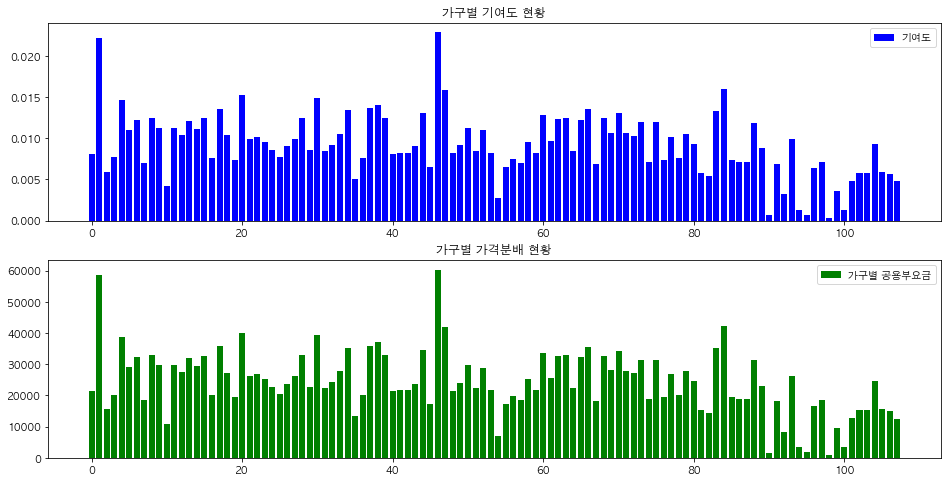

In [36]:
plt.figure(figsize=(16,8))

ax_1 = plt.subplot(2,1,1)
ax_1.bar(range(len(month_df)), month_df['contribution'], color='b', label='기여도')
ax_1.set_title("가구별 기여도 현황")
ax_1.legend()

ax_2 = plt.subplot(2,1,2)
ax_2.bar(range(len(month_df)), simple_cont['단순 가격분배'], color='g', label='가구별 공용부요금')
ax_2.set_title("가구별 가격분배 현황")
ax_2.legend()

plt.show()

In [56]:
# 최소사용량 : 아파트1-104-905
# 평균사용량 : 아파트1-102-801
# 최대사용량 : 아파트1-102-903
min_h = simple_cont[simple_cont['name'] == '아파트1-104-905']
mean_h = simple_cont[simple_cont['name'] == '아파트1-102-801']
max_h = simple_cont[simple_cont['name'] == '아파트1-102-903']

problem_simple_cont = pd.concat([min_h, mean_h, max_h])
problem_simple_cont

,name,usage (kWh),contribution,단순 가격분배
107,아파트1-104-905,148,0.004758,12564
43,아파트1-102-801,280,0.009002,23770
46,아파트1-102-903,711,0.022859,60360
